### Module Imports

In [1]:
import sys
from insurance_analytics.core.registry import settings
from insurance_analytics.preprocessing.cleaner import cleaning
from insurance_analytics.data.load_data import load_data
from insurance_analytics.preprocessing.feature_engineering import add_loss_ratio
from insurance_analytics.eda.exploration import (
    dataset_overview, duplicated_rows, detect_outliers_iqr,summarize_missing
)
from insurance_analytics.utils.io_utils import write_csv
from insurance_analytics.viz.plots import ( plot_histogram,
plot_bar,
correlation_matrix,
boxplot_outliers,
scatter_outliers,
highlight_outliers_iqr,
scatter_by_group)

### Config and Data Load

In [2]:
name = "MachineLearningRating_v3.txt"
raw_path = settings.DATA["raw_dir"] / name
report_path = settings.REPORTS["reports_dir"]
plots_dir = settings.REPORTS["plots_dir"]
processed_dir = settings.DATA["processed_dir"]

# Load data with error handling
try:
    df = load_data(raw_path)
    print(f"Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Error: File not found at {raw_path}")
    sys.exit(1)
except ValueError as e:
    print(f"Error loading data: {e}")
    sys.exit(1)
except Exception as e:
    print(f"Unexpected error: {e}")
    sys.exit(1)

Data loaded successfully: 1000098 rows, 52 columns


 #### Data Structure Before Process

In [3]:
dataset_overview(df)


--- Dataset Shape ---
(1000098, 52)

--- Column Info ---
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodyty

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
duplicated_rows(df)

Duplicated rows: 0


np.int64(0)

In [5]:
summarize_missing(df)

NumberOfVehiclesInFleet    1.000000
CrossBorder                0.999302
CustomValueEstimate        0.779566
Rebuilt                    0.641838
Converted                  0.641838
WrittenOff                 0.641838
NewVehicle                 0.153280
Bank                       0.145947
AccountType                0.040228
Gender                     0.009535
MaritalStatus              0.008258
VehicleType                0.000552
make                       0.000552
mmcode                     0.000552
Model                      0.000552
Cylinders                  0.000552
bodytype                   0.000552
kilowatts                  0.000552
NumberOfDoors              0.000552
VehicleIntroDate           0.000552
dtype: float64

### Full Data Cleaning Pipeline

In [6]:
# 3️⃣ Clean Data

df_clean = cleaning(df, date_cols=["TransactionMonth"])


D:\10Acadamy\Week 3\Tasks\Predictive-Modeling\src\insurance_analytics\preprocessing\cleaner.py:55: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


# Calculate LossRatio

In [7]:
df = add_loss_ratio(df_clean)

 ### Data Structure After Process

In [8]:
dataset_overview(df_clean)


--- Dataset Shape ---
(1000098, 50)

--- Column Info ---
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth              int64
IsVATRegistered                bool
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
Number

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,1425168000000000000,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,1430438400000000000,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,1435708800000000000,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN
3,145255,12827,1430438400000000000,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,0.0
4,145255,12827,1435708800000000000,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN


In [9]:
duplicated_rows(df_clean)

Duplicated rows: 0


np.int64(0)

In [10]:
summarize_missing(df_clean)

CustomValueEstimate    0.779566
WrittenOff             0.641838
Rebuilt                0.641838
Converted              0.641838
CapitalOutstanding     0.500049
LossRatio              0.381597
NewVehicle             0.153280
Bank                   0.145947
AccountType            0.040228
Gender                 0.009535
MaritalStatus          0.008258
VehicleType            0.000552
mmcode                 0.000552
VehicleIntroDate       0.000552
kilowatts              0.000552
cubiccapacity          0.000552
bodytype               0.000552
NumberOfDoors          0.000552
Model                  0.000552
make                   0.000552
dtype: float64

### UNIVARIATE ANALYSIS

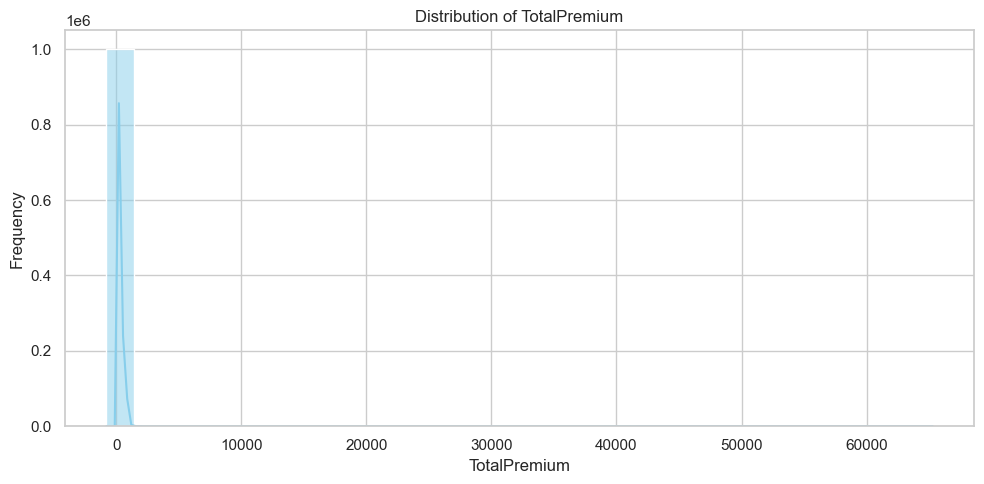

D:\10Acadamy\Week 3\Tasks\Predictive-Modeling\src\insurance_analytics\viz\plots.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="pastel")


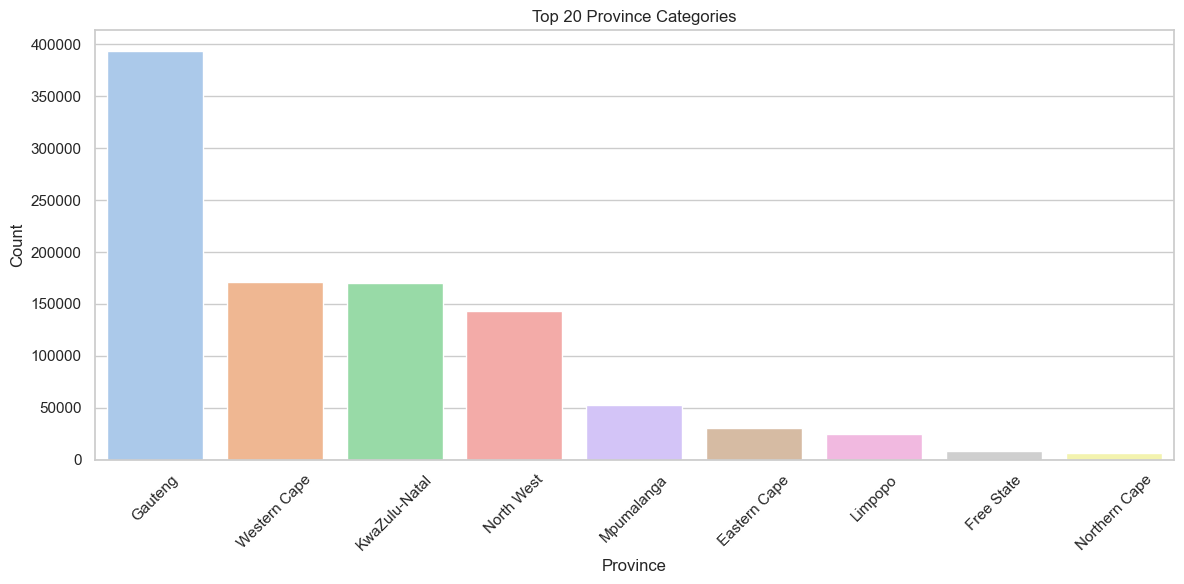

In [11]:

# Univariate
plot_histogram(df_clean, "TotalPremium",
                   save_path=plots_dir / "hist_totalpremium.png")
plot_bar(df_clean, "Province", save_path=plots_dir / "bar_province.png")

### Bivariate / Multivariate Analysis

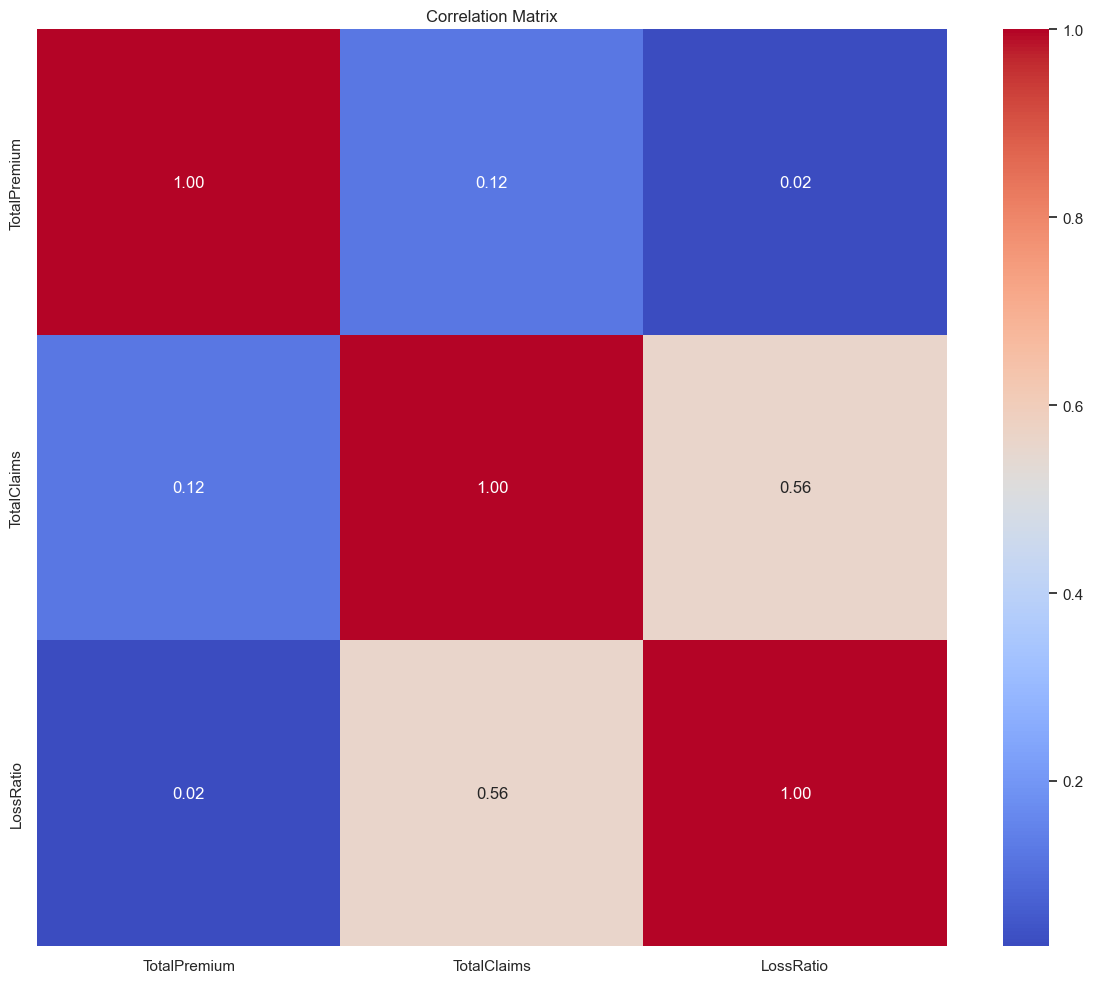

D:\10Acadamy\Week 3\Tasks\Predictive-Modeling\src\insurance_analytics\viz\plots.py:173: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
D:\10Acadamy\Week 3\Tasks\Predictive-Modeling\src\insurance_analytics\viz\plots.py:176: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(save_path, dpi=300)


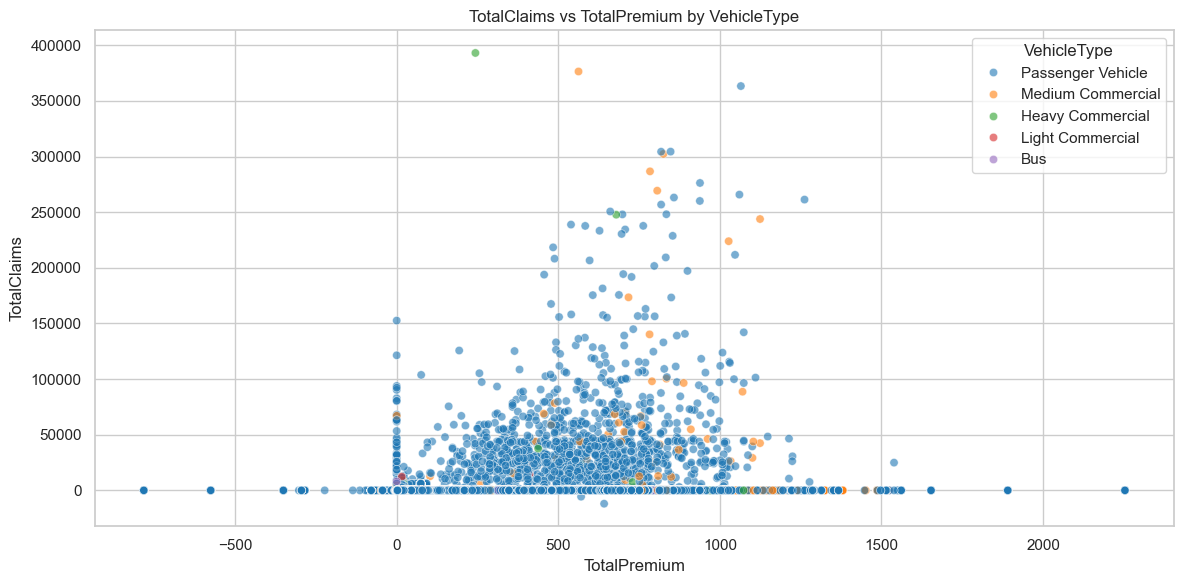

In [12]:

# Bivariate / Multivariate
correlation_matrix(df_clean, numeric_cols=[
                       "TotalPremium", "TotalClaims", "LossRatio"], save_path=plots_dir / "corr_matrix.png")
scatter_by_group(df_clean, "TotalPremium", "TotalClaims", "VehicleType",
                     save_path=plots_dir / "scatter_premium_claims.png")

### Outlier Detection

In [13]:
# Outliers
outliers = detect_outliers_iqr(df_clean, "TotalClaims")

TotalClaims: 2793 outliers detected


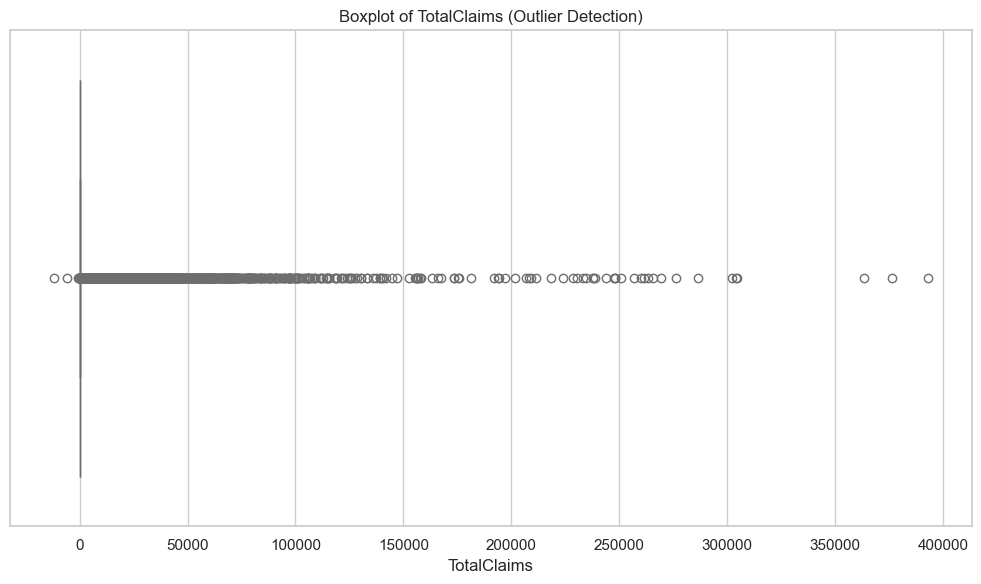

In [14]:
# Boxplot
boxplot_outliers(df_clean, "TotalClaims")

d:\10Acadamy\Week 3\Tasks\Predictive-Modeling\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


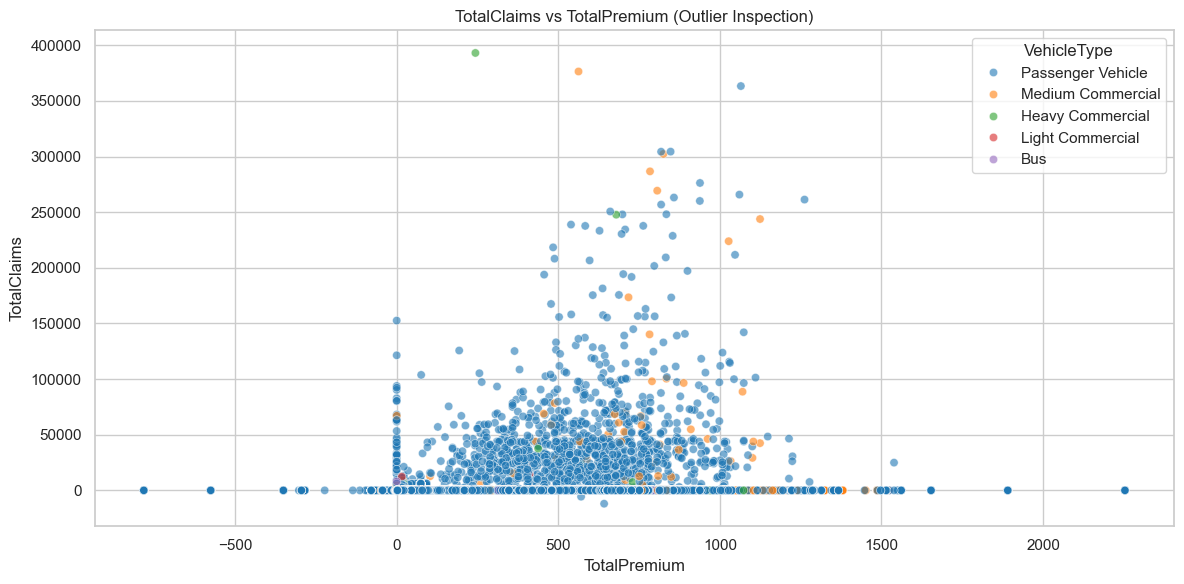

In [15]:
# Scatter plot relative to Premium
scatter_outliers(df_clean, x_col="TotalPremium",
                 y_col="TotalClaims", hue_col="VehicleType")

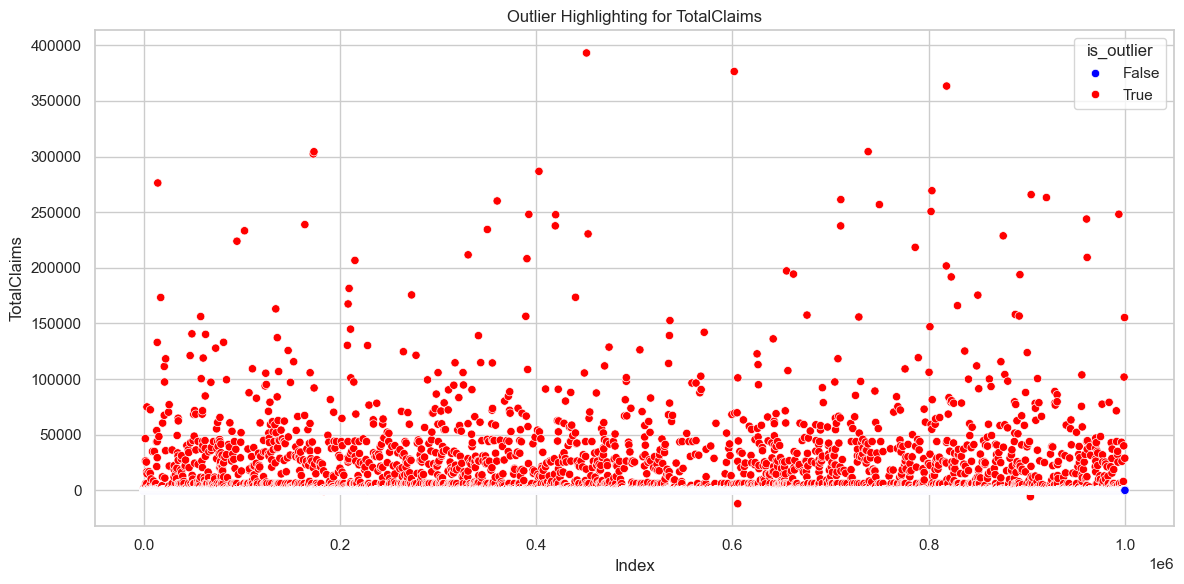

In [16]:
# Highlight IQR-based outliers
highlight_outliers_iqr(df_clean, "TotalClaims")

In [17]:
path =  processed_dir /  "insurance_cleaned.csv"
         
write_csv(df=df_clean,path=path)
print(f"[IO] CSV saved successfully")

[IO] CSV file is saved sucessfully
[IO] CSV saved successfully
